In [1]:
import numpy as np
import astropy
import astroquery
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [2]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('GCNS')
print({k:v.description for k,v in catalog_list.items()})

{'J/A+A/649/A6': 'Gaia Catalogue of Nearby Stars - GCNS (Gaia collaboration, 2021)'}


In [3]:
Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list.keys())
print(catalogs)

TableList with 8 tables:
	'0:J/A+A/649/A6/table1c' with 31 column(s) and 331312 row(s) 
	'1:J/A+A/649/A6/table1r' with 31 column(s) and 880428 row(s) 
	'2:J/A+A/649/A6/progwd' with 3 column(s) and 45 row(s) 
	'3:J/A+A/649/A6/table3' with 9 column(s) and 19176 row(s) 
	'4:J/A+A/649/A6/maglim' with 13 column(s) and 12288 row(s) 
	'5:J/A+A/649/A6/missing' with 9 column(s) and 1259 row(s) 
	'6:J/A+A/649/A6/hyacomb' with 4 column(s) and 1132 row(s) 
	'7:J/A+A/649/A6/distpdf' with 15 column(s) and 1211740 row(s) 


In [4]:
stellardata=catalogs['J/A+A/649/A6/table1c']

In [5]:
#stellardata

In [6]:
tangential_velocity=4.74*np.sqrt((stellardata['pmDE']/1000)**2+(stellardata['pmRA']/1000)**2)*(1000/stellardata['Plx'])
#Gives tangential velocity in km/s
#tangential_velocity

In [7]:
abs_Gmag=stellardata['Gmag']-5*np.log((stellardata['Dist50']*1000)/10)
#abs_Gmag

In [8]:
stellardata["Tangential Velocity"]=tangential_velocity
stellardata["Abs G Magnitude"]=abs_Gmag

In [9]:
#stellardata

In [10]:
#Color Indices
stellardata["G-RP"]=stellardata['Gmag']-stellardata['RPmag']
stellardata["G-J"]=stellardata['Gmag']-stellardata['Jmag']

In [11]:
stellardata

GaiaEDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,RV,Dist50,xcoord50,ycoord50,zcoord50,Uvel50,Vvel50,Wvel50,gmag,rmag,imag,zmag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,GAIAEDR3Cat,_RA.icrs,_DE.icrs,Tangential Velocity,Abs G Magnitude,G-RP,G-J
,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,km / s,kpc,pc,pc,pc,km / s,km / s,km / s,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,bytes11,float64,float64,float64,float64,float64,float64
2334666126716440064,0.0025650,-26.3653495,14.697,23.497,-62.339,15.7779,17.4299,14.5407,--,0.06803,11.27021,7.54892,-66.66381,--,--,--,17.796,16.549,15.059,14.396,12.833,12.267,11.977,11.799,11.606,11.100,9.074,GAIAEDR3Cat,0.0024484,-26.3650724,21.486021907447356,6.191081543185383,1.2372000000000014,2.944899816894532
2341871673090078592,0.0051210,-19.4988406,26.798,179.805,-1.041,8.9429,9.4761,8.2513,--,0.03739,4.10140,8.09092,-36.27160,--,--,--,9.979,8.946,8.662,9.726,7.402,6.975,6.807,6.868,6.800,6.722,6.704,GAIAEDR3Cat,0.0042732,-19.4988360,31.80423851858622,2.348809020025116,0.6915999999999993,1.5409000495910643
530861741656374272,0.0056369,70.8873639,10.282,-52.864,17.787,10.8521,11.3022,10.2396,-26.204,0.09726,-46.21263,84.37781,14.27200,32.872,-13.707,8.930,--,--,--,--,9.523,9.079,9.007,8.965,9.024,8.937,8.649,GAIAEDR3Cat,0.0063545,70.8872848,25.712798252208,-0.5219135599079721,0.6125000000000007,1.3291002365112305
2745400068346761216,0.0093361,6.5110167,16.260,117.495,9.521,16.2772,18.2886,14.9456,--,0.06152,-6.73827,35.40890,-49.85672,--,--,--,18.661,17.399,15.571,14.717,12.922,12.312,12.031,11.866,11.660,11.630,8.881,GAIAEDR3Cat,0.0088105,6.5109744,34.36357961146171,7.193313838983288,1.3316,3.3552000686645513
2855176271335676800,0.0135364,29.2778958,10.295,51.287,46.282,15.6236,17.0649,14.4501,--,0.09716,-27.65700,77.35709,-51.86940,--,--,--,17.406,16.202,14.932,14.344,12.876,12.282,12.081,11.907,11.743,11.589,9.077,GAIAEDR3Cat,0.0132751,29.2776901,31.806764574470662,4.2547299443003705,1.1734999999999989,2.7475995956420896
4616265759236854016,0.0148925,-86.5417045,8.276,15.239,14.097,20.7053,21.4042,19.0972,--,0.11751,56.35943,-84.11356,-59.63383,--,--,--,--,--,--,--,16.323,15.729,15.282,15.021,14.847,13.058,9.303,GAIAEDR3Cat,0.0137697,-86.5417672,11.88974600299726,8.38560828324098,1.6081000000000003,4.382300045776368
2875125810310195712,0.0157909,34.1883005,20.194,-227.366,-56.934,8.3483,8.6769,7.8431,-29.942,0.04952,-15.72239,41.02444,-22.85814,61.074,-5.584,12.826,12.388,12.293,12.445,9.007,7.249,6.940,6.885,7.249,6.922,6.883,6.824,GAIAEDR3Cat,0.0170125,34.1885535,55.015819108460086,0.34934232308852575,0.5052000000000003,1.099299927520752
2335003848584711040,0.0159102,-25.4988391,12.613,-25.099,-17.494,14.6687,16.1144,13.4936,--,0.07931,12.57312,9.85767,-77.68060,--,--,--,16.457,15.264,13.971,13.404,11.925,11.293,11.037,10.926,10.774,10.602,8.804,GAIAEDR3Cat,0.0160338,-25.4987613,11.49735212397058,4.314804344494085,1.1750999999999987,2.743699809265136


In [12]:
GRPsubset=stellardata[(stellardata['G-RP']>1.0) & (stellardata['G-RP']<3.0) & (stellardata['Abs G Magnitude']>14.0)]
#GRPsubset

/Applications/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Applications/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [13]:
GJsubset=stellardata[(stellardata['G-J']>4.0) & (stellardata['G-J']<7.0) & (stellardata['Abs G Magnitude']>14.0)]
#GJsubset

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, '# of Objects')

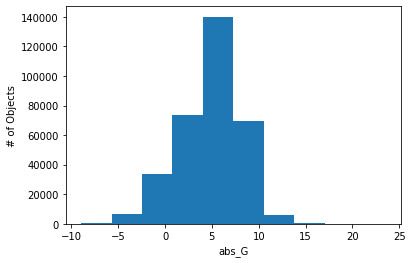

In [14]:
plt.hist(stellardata["Abs G Magnitude"])
plt.xlabel("abs_G")
plt.ylabel("# of Objects")

Text(0, 0.5, '# of Objects')

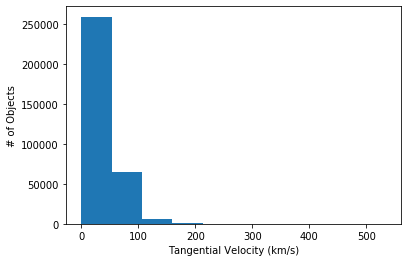

In [15]:
plt.hist(stellardata["Tangential Velocity"])
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("# of Objects")

This is for an approximate G-RP subset of stars.


Text(0, 0.5, '# of Objects')

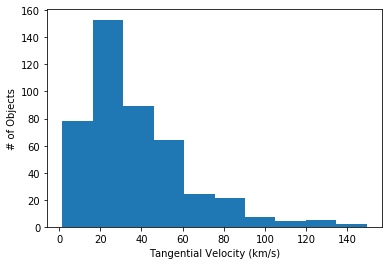

In [16]:
print("This is for an approximate G-RP subset of stars.")
plt.hist(GRPsubset['Tangential Velocity'])
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("# of Objects")

This is for an approximate G-J subset of stars.


Text(0, 0.5, '# of Objects')

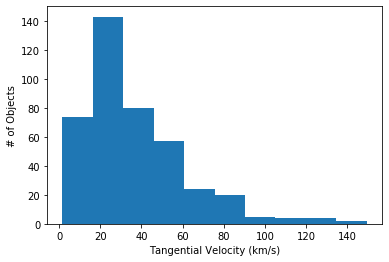

In [17]:
print("This is for an approximate G-J subset of stars.")
plt.hist(GJsubset['Tangential Velocity'])
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("# of Objects")

Text(0, 0.5, 'Abs G Magnitude')

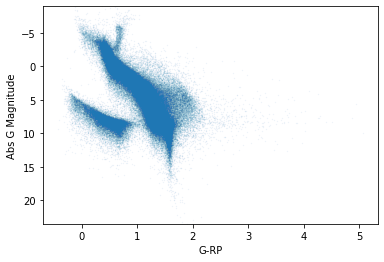

In [18]:
plt.scatter(stellardata['G-RP'],stellardata['Abs G Magnitude'],s=0.1,alpha=0.1)
plt.ylim(max(stellardata['Abs G Magnitude']), min(stellardata['Abs G Magnitude']))
plt.xlabel("G-RP")
plt.ylabel("Abs G Magnitude")

Text(0, 0.5, 'Abs G Magnitude')

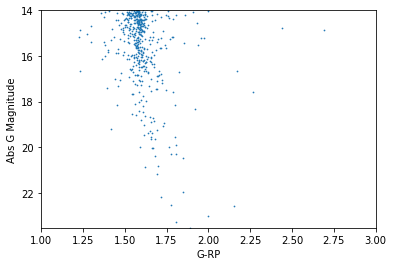

In [19]:
plt.scatter(stellardata['G-RP'],stellardata['Abs G Magnitude'],s=0.5)
#plt.ylim(max(stellardata['Abs G Magnitude']), min(stellardata['Abs G Magnitude']))
plt.xlim(1,3)
plt.ylim(max(stellardata['Abs G Magnitude']),14)
plt.xlabel("G-RP")
plt.ylabel("Abs G Magnitude")

Text(0, 0.5, 'Abs G Magnitude')

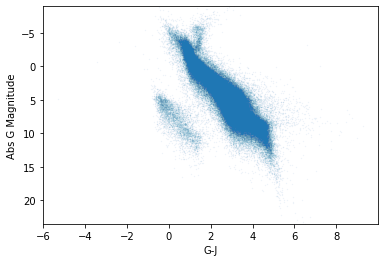

In [20]:
plt.scatter(stellardata['G-J'],stellardata['Abs G Magnitude'],s=0.1,alpha=0.1)
plt.ylim(max(stellardata['Abs G Magnitude']), min(stellardata['Abs G Magnitude']))
plt.xlabel("G-J")
plt.ylabel("Abs G Magnitude")

Text(0, 0.5, 'Abs G Magnitude')

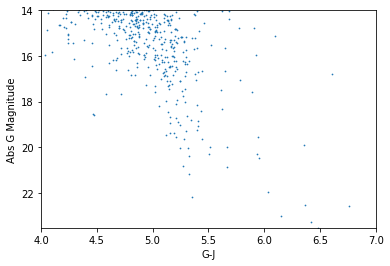

In [21]:
plt.scatter(stellardata['G-J'],stellardata['Abs G Magnitude'],s=0.5)
#plt.ylim(max(stellardata['Abs G Magnitude']), min(stellardata['Abs G Magnitude']))
plt.xlim(4,7)
plt.ylim(max(stellardata['Abs G Magnitude']),14)
plt.xlabel("G-J")
plt.ylabel("Abs G Magnitude")

In [22]:
RGBsubset=stellardata[(stellardata['G-RP']>0.5) & (stellardata['G-RP']<1.0) & (stellardata['Abs G Magnitude']<-4.0)]

This is for an approximate RGB subset of stars.


Text(0, 0.5, '# of Objects')

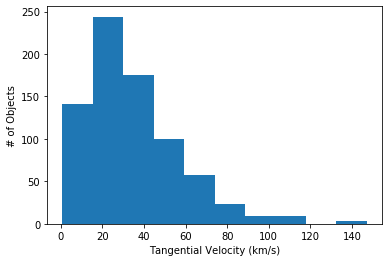

In [23]:
print("This is for an approximate RGB subset of stars.")
plt.hist(RGBsubset['Tangential Velocity'])
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("# of Objects")

Text(0, 0.5, 'Abs G Magnitude')

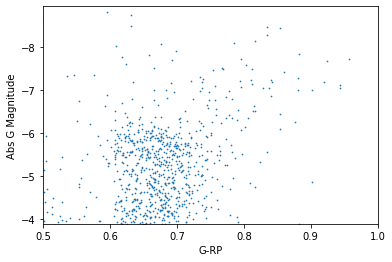

In [24]:
#RGB Set approx.
plt.scatter(stellardata['G-RP'],stellardata['Abs G Magnitude'],s=0.5)
#plt.ylim(max(stellardata['Abs G Magnitude']), min(stellardata['Abs G Magnitude']))
plt.xlim(0.5,1)
plt.ylim(-3.9,min(stellardata['Abs G Magnitude']))
plt.xlabel("G-RP")
plt.ylabel("Abs G Magnitude")

In [25]:
#RGBsubset

In [26]:
#Finding Vmax.
#In the cells below, we calculate Vmax as described in GCNS paper... arxiv#2012.02061 for reference

In [27]:
c = SkyCoord(ra=stellardata["RA_ICRS"], dec=stellardata["DE_ICRS"], frame='icrs')
c

<SkyCoord (ICRS): (ra, dec) in deg
    [(2.56500000e-03, -26.3653495), (5.12100000e-03, -19.4988406),
     (5.63690000e-03,  70.8873639), ..., (3.59994771e+02, -53.1822876),
     (3.59995813e+02,  60.9183058), (3.59999926e+02, -30.0245287)]>

In [28]:
cgal=c.galactic
cgal
#cgal.size

<SkyCoord (Galactic): (l, b) in deg
    [( 33.81465884, -78.49844234), ( 63.11894944, -75.9590265 ),
     (118.70895672,   8.43836494), ..., (319.58451356, -62.25059824),
     (116.71800813,  -1.33113716), ( 15.52038568, -78.34899003)]>

In [29]:
#cgal.b

In [30]:
#Convert to radians.....
gal_latitude=cgal.b
#gal_latitude
np.sin(np.abs(np.deg2rad(gal_latitude.value)))

array([0.97991928, 0.97012247, 0.14674541, ..., 0.8849925 , 0.02323064,
       0.97939584])

In [31]:
H=365*u.pc
dmax=100*u.pc
#dmax
sky_area=4*np.pi
#sky_area
ξ=(dmax*np.sin(np.abs(np.deg2rad(gal_latitude.value)))/H)
#sky_area
#np.min(ξ.value)
#gal_latitude.value

In [32]:
#gal_latitude.value

In [33]:
Vmax=sky_area*((H.value**3)/(np.sin(np.abs(np.deg2rad(gal_latitude.value))))**3)*(2-((ξ.value**2+(2*ξ.value)+2)*np.exp(-ξ.value)))
stellardata["Vmax"]=Vmax
#stellardata
#stellardata['Vmax']

In [34]:
#Adding absolute G Magnitude to stellardata in preparation for calculation of luminosity function.

dm=5.0*(np.log10(stellardata['Dist50']*1000/10))
absG=stellardata['Gmag']-dm
#absG_rounded=np.rint(2*absG)
#int_absG=(absG_rounded.astype(int))
#i_close=(stellardata['Dist50']*1000<50)
stellardata["absG"]=absG
stellardata

GaiaEDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,RV,Dist50,xcoord50,ycoord50,zcoord50,Uvel50,Vvel50,Wvel50,gmag,rmag,imag,zmag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,GAIAEDR3Cat,_RA.icrs,_DE.icrs,Tangential Velocity,Abs G Magnitude,G-RP,G-J,Vmax,absG
,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,km / s,kpc,pc,pc,pc,km / s,km / s,km / s,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,bytes11,float64,float64,float64,float64,float64,float64,float64,float64
2334666126716440064,0.0025650,-26.3653495,14.697,23.497,-62.339,15.7779,17.4299,14.5407,--,0.06803,11.27021,7.54892,-66.66381,--,--,--,17.796,16.549,15.059,14.396,12.833,12.267,11.977,11.799,11.606,11.100,9.074,GAIAEDR3Cat,0.0024484,-26.3650724,21.486021907447356,6.191081543185383,1.2372000000000014,2.944899816894532,3429554.2505361154,11.614397645197165
2341871673090078592,0.0051210,-19.4988406,26.798,179.805,-1.041,8.9429,9.4761,8.2513,--,0.03739,4.10140,8.09092,-36.27160,--,--,--,9.979,8.946,8.662,9.726,7.402,6.975,6.807,6.868,6.800,6.722,6.704,GAIAEDR3Cat,0.0042732,-19.4988360,31.80423851858622,2.348809020025116,0.6915999999999993,1.5409000495910643,3436370.589872347,6.079122674228902
530861741656374272,0.0056369,70.8873639,10.282,-52.864,17.787,10.8521,11.3022,10.2396,-26.204,0.09726,-46.21263,84.37781,14.27200,32.872,-13.707,8.930,--,--,--,--,9.523,9.079,9.007,8.965,9.024,8.937,8.649,GAIAEDR3Cat,0.0063545,70.8872848,25.712798252208,-0.5219135599079721,0.6125000000000007,1.3291002365112305,4064493.6311802194,5.912428673839207
2745400068346761216,0.0093361,6.5110167,16.260,117.495,9.521,16.2772,18.2886,14.9456,--,0.06152,-6.73827,35.40890,-49.85672,--,--,--,18.661,17.399,15.571,14.717,12.922,12.312,12.031,11.866,11.660,11.630,8.881,GAIAEDR3Cat,0.0088105,6.5109744,34.36357961146171,7.193313838983288,1.3316,3.3552000686645513,3549575.3097005812,12.332118366033129
2855176271335676800,0.0135364,29.2778958,10.295,51.287,46.282,15.6236,17.0649,14.4501,--,0.09716,-27.65700,77.35709,-51.86940,--,--,--,17.406,16.202,14.932,14.344,12.876,12.282,12.081,11.907,11.743,11.589,9.077,GAIAEDR3Cat,0.0132751,29.2776901,31.806764574470662,4.2547299443003705,1.1734999999999989,2.7475995956420896,3755106.0602370803,10.686162469334535
4616265759236854016,0.0148925,-86.5417045,8.276,15.239,14.097,20.7053,21.4042,19.0972,--,0.11751,56.35943,-84.11356,-59.63383,--,--,--,--,--,--,--,16.323,15.729,15.282,15.021,14.847,13.058,9.303,GAIAEDR3Cat,0.0137697,-86.5417672,11.88974600299726,8.38560828324098,1.6081000000000003,4.382300045776368,3775365.7098269174,15.35492586866236
2875125810310195712,0.0157909,34.1883005,20.194,-227.366,-56.934,8.3483,8.6769,7.8431,-29.942,0.04952,-15.72239,41.02444,-22.85814,61.074,-5.584,12.826,12.388,12.293,12.445,9.007,7.249,6.940,6.885,7.249,6.922,6.883,6.824,GAIAEDR3Cat,0.0170125,34.1885535,55.015819108460086,0.34934232308852575,0.5052000000000003,1.099299927520752,3810935.5757315946,4.874396819939692
2335003848584711040,0.0159102,-25.4988391,12.613,-25.099,-17.494,14.6687,16.1144,13.4936,--,0.07931,12.57312,9.85767,-77.68060,--,--,--,16.457,15.264,13.971,13.404,11.925,11.293,11.037,10.926,10.774,10.602,8.804,GAIAEDR3Cat,0.0160338,-25.4987613,11.49735212397058,4.314804344494085,1.1750999999999987,2.743699809265136,3429847.331217874,10.172060250611729


In [35]:
####Creating an array which will be used to house our luminosity function data. From below, we create it to have a 
#length cooresponding to the number of absolute magnitude bins we selected.
lf_spacedensity=np.zeros(82)

In [36]:
#np.nditer(int_absG)

In [37]:
#######Initial method for finding luminosity function. Ultimately went a different direction. See below.########
#for i in np.nditer(int_absG):
    #discards things that were NaNs (now very large +/- integers) or lie outside range
#    if ((i>=0)&(i<60)):        
        #lf_spacedensity=np.sum(1/stellardata['Vmax'])
#        lf_count[i]+=1
        #do something more sophiscated with Vmax if limits vary

In [38]:
#for i in np.nditer(int_absG):
#    if ((i>=0)&(i<=60)):
#        lf_values1[i]=np.sum(1/stellardata['Vmax'])
#        lf_spacedensity[i]+=1

In [39]:
#plt.plot(lf_values,lf_count)

In [40]:
#plt.bar(lf_values,lf_count)

In [41]:
#Creating 0.25 absolute G magnitude width bins, putting data into the correct bin, and counting number of data 
#points per bin.
bins=np.linspace(0.0,20.0,81)
bin_data=np.digitize(absG,bins)
bincount=np.bincount(bin_data)

In [42]:
bins

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ])

In [43]:
bin_data

array([47, 25, 24, ..., 45, 49, 59])

In [44]:
##Confirming that the absG values lie within the correct bins via print statement.
#for n in range(absG.size):
#    if ((absG[n]>=0.0)and(absG[n]<=20.0)):
#        print(bins[bin_data[n]-1], "<=", absG[n], "<", bins[bin_data[n]])
    

In [45]:
#Run a for loop to create array of luminosity function values for each absolute magnitude bin. AbsG magnitudes are
#constrained between 0 and 20
for n1 in range(absG.size):
    if ((absG[n1]>=0.0)and(absG[n1]<=20.0)):
            my_bin=bin_data[n1]
            lf_spacedensity[my_bin]+=1.0/Vmax[n1]
print(lf_spacedensity)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


[0.00000000e+00 2.75284237e-05 6.40629265e-05 5.80911548e-05
 5.74058336e-05 5.54328800e-05 6.77345901e-05 8.31030718e-05
 1.06489753e-04 1.33950813e-04 1.72864123e-04 2.03194060e-04
 2.82929539e-04 3.56227132e-04 4.25872134e-04 4.92716693e-04
 5.51477149e-04 5.92476762e-04 6.37653337e-04 6.96669324e-04
 7.23940934e-04 8.05909107e-04 8.20594136e-04 8.30831896e-04
 9.10778047e-04 8.95539997e-04 9.26114062e-04            inf
 9.69464046e-04 9.52764957e-04 1.03959717e-03 1.08543661e-03
 1.16512713e-03 1.25131094e-03 1.42320529e-03 1.54921139e-03
 1.73653195e-03 1.91905160e-03            inf 2.51851968e-03
 2.88744330e-03 3.15271888e-03 3.32282224e-03 3.41559502e-03
 3.52163468e-03 3.41071296e-03            inf 3.18558920e-03
 3.01629766e-03 2.82266011e-03 2.58141395e-03 2.33953143e-03
 2.16797530e-03            inf 1.78860113e-03 1.65180417e-03
 1.61999826e-03 1.54857248e-03            inf 1.55078187e-03
 1.67980818e-03 1.57928867e-03 1.37896574e-03 1.06444462e-03
 4.82410238e-04 2.750562

In [46]:
#Here we see that some values in the luminosity function are equal to infinity...Obviously something is off. So lets
#look at where Vmax=0 as the luminosity function is defined as np.sum(1/Vmax)
bin_data[n1]
print(np.where(Vmax==0))

(array([ 88523,  99116, 113313, 126802, 141279]),)


In [47]:
#So lets look at these specific data points within stellardata to see if we notice anything else unusual...
stellardata[Vmax==0]

GaiaEDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,RV,Dist50,xcoord50,ycoord50,zcoord50,Uvel50,Vvel50,Wvel50,gmag,rmag,imag,zmag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,GAIAEDR3Cat,_RA.icrs,_DE.icrs,Tangential Velocity,Abs G Magnitude,G-RP,G-J,Vmax,absG
,deg,deg,mas,mas / yr,mas / yr,mag,mag,mag,km / s,kpc,pc,pc,pc,km / s,km / s,km / s,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,deg,deg,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,bytes11,float64,float64,float64,float64,float64,float64,float64,float64
3327951015558541568,97.3519547,10.6137634,10.562,19.601,-16.650,16.2810,17.9411,15.0415,--,0.09467,-88.38877,-33.90954,0.00284,--,--,--,18.325,17.064,15.583,14.887,13.288,12.718,12.483,12.310,12.133,12.241,8.600,GAIAEDR3Cat,97.3518661,10.6138374,11.541742968182986,5.041939664266229,1.2394999999999996,2.9929998931884754,0.0,11.399938114413112
3045194966065621376,109.1251674,-12.0229353,10.425,-7.429,-36.429,17.9720,20.1764,16.5714,--,0.09581,-65.98694,-69.45853,0.00181,--,--,--,20.553,19.399,17.229,16.303,14.501,13.893,13.492,13.372,13.222,--,--,GAIAEDR3Cat,109.1252012,-12.0227734,16.90431104844411,6.673090146656319,1.4006000000000007,3.470999595642091,0.0,13.06494579917056
5542905954081407488,124.8878611,-36.2037529,12.400,-28.473,-95.660,18.9197,20.7024,17.3801,--,0.08081,-21.57676,-77.87298,0.00186,--,--,--,--,--,--,--,15.036,14.526,14.086,14.178,13.931,--,--,GAIAEDR3Cat,124.8880179,-36.2033277,38.15224144626489,8.472121863743446,1.5396,3.8836997482299793,0.0,14.382374466170718
5314058757841431680,140.0933207,-49.7442308,10.900,57.212,-120.023,14.2061,15.5364,13.0670,--,0.09173,3.15140,-91.67947,-0.00090,--,--,--,15.637,14.717,--,--,11.575,10.913,10.667,10.461,10.439,10.366,8.798,GAIAEDR3Cat,140.0929272,-49.7436974,57.81991087778017,3.1247780673624064,1.1390999999999991,2.6311001907348626,0.0,9.393543032462015
5351713560765548928,156.6919496,-57.5970727,13.972,3.354,-76.917,10.8661,11.4687,10.1240,28.330,0.07157,17.91523,-69.29268,0.00186,21.303,-23.763,-21.610,--,--,--,--,9.273,8.670,8.542,8.453,8.488,7.553,6.466,GAIAEDR3Cat,156.6919218,-57.5967308,26.118883065920418,1.025645506217698,0.7420999999999989,1.59310023651123,0.0,6.592444913930288


In [48]:
#print(gal_latitude[88523])
cgal[88523]

<SkyCoord (Galactic): (l, b) in deg
    (200.98885994, 0.00171935)>

In [49]:
#Found ξ to be of order 10^(-6) for Vmax[ 88523,  99116, 113313, 126802, 141279] indices. All other values were of
#order 10^(-2). Seems that for some reason these values have extremely small galactic latitudes. Along galactic
#equator, but not near galactic center. Related to GAIA limitations? Or Vmax equation seems to break down for 
#galactic latitudes ~=0.

In [50]:
#But moving on and deleting the infinty values within the luminosity function...
lf_spacedensity1=np.delete(lf_spacedensity,np.where(lf_spacedensity==np.inf))

In [51]:
lf_spacedensity1

array([0.00000000e+00, 2.75284237e-05, 6.40629265e-05, 5.80911548e-05,
       5.74058336e-05, 5.54328800e-05, 6.77345901e-05, 8.31030718e-05,
       1.06489753e-04, 1.33950813e-04, 1.72864123e-04, 2.03194060e-04,
       2.82929539e-04, 3.56227132e-04, 4.25872134e-04, 4.92716693e-04,
       5.51477149e-04, 5.92476762e-04, 6.37653337e-04, 6.96669324e-04,
       7.23940934e-04, 8.05909107e-04, 8.20594136e-04, 8.30831896e-04,
       9.10778047e-04, 8.95539997e-04, 9.26114062e-04, 9.69464046e-04,
       9.52764957e-04, 1.03959717e-03, 1.08543661e-03, 1.16512713e-03,
       1.25131094e-03, 1.42320529e-03, 1.54921139e-03, 1.73653195e-03,
       1.91905160e-03, 2.51851968e-03, 2.88744330e-03, 3.15271888e-03,
       3.32282224e-03, 3.41559502e-03, 3.52163468e-03, 3.41071296e-03,
       3.18558920e-03, 3.01629766e-03, 2.82266011e-03, 2.58141395e-03,
       2.33953143e-03, 2.16797530e-03, 1.78860113e-03, 1.65180417e-03,
       1.61999826e-03, 1.54857248e-03, 1.55078187e-03, 1.67980818e-03,
      

In [52]:
lf_spacedensity1.size

77

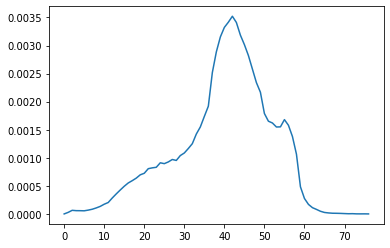

In [53]:
#Plot of luminosity function for GCNS sample of stars which have absolute G magnitudes between 0 and 20 broken up into
#0.25 absolute magitude bins.
plt.plot(lf_spacedensity1)

In [54]:
#Why are x limits so high?
#What are implications of this luminosity function?